# 🏡 Min-Max Normalization Workshop

## Team Number: 7  
**Team Members:**  
- Fenil  
- Preetpal  
- Krishna  

---

In this notebook, we apply **manual Min-Max normalization** to real-world housing data.  
We include clear explanations, visual comparisons, and code that keeps original values intact.  
All steps are reproducible and follow best practices in data preprocessing.


## ❗ Why We Normalize: The Problem with Raw Feature Scales

In housing data, features like `Price` and `Lot_Size` can have values in the hundreds of thousands, while others like `Num_Bedrooms` range from 1 to 5. This creates problems when we use algorithms that depend on numeric magnitudes.

---

### ⚠️ What Goes Wrong Without Normalization

---

### 1. 🧭 K-Nearest Neighbors (KNN)

KNN uses the **Euclidean distance** formula:

$$
d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + \cdots}
$$

**Example:**

- $ \text{Price}_1 = 650{,}000, \quad \text{Price}_2 = 250{,}000 $
- $ \text{Bedrooms}_1 = 3, \quad \text{Bedrooms}_2 = 2 $

Now compute squared differences:

$$
(\text{Price}_1 - \text{Price}_2)^2 = (650{,}000 - 250{,}000)^2 = (400{,}000)^2 = 1.6 \times 10^{11}
$$
$$
(\text{Bedrooms}_1 - \text{Bedrooms}_2)^2 = (3 - 2)^2 = 1
$$

➡️ **Price dominates the distance calculation**, making smaller features like `Bedrooms` irrelevant.

---

### 2. 📉 Linear Regression

Linear regression estimates:

$$
y = \beta_1 \cdot \text{Price} + \beta_2 \cdot \text{Bedrooms} + \beta_3 \cdot \text{Lot\_Size} + \epsilon
$$

If `Price` has very large values:
- Gradient updates for $ \beta_1 $ will be **much larger**
- Gradient updates for $ \beta_2 $ (Bedrooms) will be **very small**

➡️ The model overfits high-magnitude features like `Price`.

---

### 3. 🧠 Neural Networks

A single neuron computes:

$$
z = w_1 \cdot \text{Price} + w_2 \cdot \text{Bedrooms} + w_3 \cdot \text{Lot\_Size}
$$

If:

- $ \text{Price} = 650{,}000 $
- $ \text{Bedrooms} = 3 $
- $ \text{Lot\_Size} = 8{,}000 $

Then:

$$
z \approx w_1 \cdot 650{,}000 + w_2 \cdot 3 + w_3 \cdot 8{,}000
$$

➡️ Even with equal weights, `Price` contributes **most of the activation**, making it difficult for the network to learn from other features.

---

### ✅ Solution: Min-Max Normalization

We apply the transformation:

$$
x_{\text{normalized}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

This scales all features to a common range (typically $[0, 1]$).

| Feature      | Raw Value | Min     | Max     | Normalized Value |
|--------------|-----------|---------|---------|------------------|
| Price        | 650,000   | 250,000 | 800,000 | 0.72             |
| Bedrooms     | 3         | 1       | 5       | 0.50             |
| Lot_Size     | 8,000     | 3,000   | 10,000  | 0.714            |

➡️ Now, **each feature contributes fairly** to model training or distance comparisons.

---

# In-Class Activity for min-max-normalization-workshop

### Step 1: Import Libraries & Load Dataset

We use pandas to load and inspect the dataset.  
This helps us preview the structure before any processing.


In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2 : Loading the dataset

In [2]:
# Load the housing dataset
house_data = pd.read_csv("data/housing_data.csv")  # Adjust path if needed

# Show first 5 rows
house_data.head()


,House_ID,Price,Area_sqft,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size
0,H100000,574507,1462,3,3,2002,4878
1,H100001,479260,1727,2,2,1979,4943
2,H100002,597153,1403,5,2,1952,5595
3,H100003,728454,1646,5,2,1992,9305
4,H100004,464876,853,1,1,1956,7407


### Step 2: Dataset Overview
We check the data types, column names, and some basic statistics.  
This helps us understand what kind of values we are working with.


In [3]:
# Show column names, data types, and non-null counts
house_data.info()

# Show basic statistics for numeric columns
house_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   House_ID       2000 non-null   object
 1   Price          2000 non-null   int64 
 2   Area_sqft      2000 non-null   int64 
 3   Num_Bedrooms   2000 non-null   int64 
 4   Num_Bathrooms  2000 non-null   int64 
 5   Year_Built     2000 non-null   int64 
 6   Lot_Size       2000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 109.5+ KB


,Price,Area_sqft,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.068961e+05,1796.453000,2.983500,1.966000,1985.689500,6025.246000
std,1.478786e+05,502.185109,1.409333,0.825945,21.159536,2008.527265
min,1.000000e+05,400.000000,1.000000,1.000000,1950.000000,1000.000000
25%,4.066002e+05,1445.000000,2.000000,1.000000,1967.000000,4664.000000
50%,5.067030e+05,1799.500000,3.000000,2.000000,1986.000000,6010.500000
75%,6.024458e+05,2132.000000,4.000000,3.000000,2003.000000,7414.000000
max,1.077909e+06,3763.000000,5.000000,3.000000,2022.000000,13088.000000


### interpretation

- There are 2000 rows 
- `Price` ranges from **100,000 to 1,077,909 CAD**
- `Area_sqft` ranges from **400 to 3,763 sqft**
- `Lot_Size` ranges from **1,000 to 13,088 sqft**

This confirms these columns have large numerical spreads and need scaling.

- Most columns are numeric and clean — good for normalization.
- House_ID is an ID and should not be scaled.
- Price, Area_sqft, and Lot_Size have a wide range — these are ideal for Min-Max scaling.
- Year_Built is numeric, but it's time-based — we won't scale it unless needed for modeling.
- Bed and bath counts are small integers and can be scaled if used in models.


### Step 3: Quick Data Quality Check

Before scaling, we check for:
- Missing values
- Duplicate rows
- Zero values (may be valid or defaults)

These help catch hidden issues without changing the original data.


In [4]:
# Check for missing values
print("Missing values per column:")
print(house_data.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(house_data.duplicated().sum())

# Check for zero values in numeric columns
numeric_columns = house_data.select_dtypes(include='number').columns
zero_counts = (house_data[numeric_columns] == 0).sum()
print("\nColumns with zero values:")
print(zero_counts[zero_counts > 0])


Missing values per column:
House_ID         0
Price            0
Area_sqft        0
Num_Bedrooms     0
Num_Bathrooms    0
Year_Built       0
Lot_Size         0
dtype: int64

Number of duplicate rows:
0

Columns with zero values:
Series([], dtype: int64)


### What We Found

- No missing values or duplicate rows — the dataset is complete and clean.
- No zero values found in numeric columns.
- We're ready to scale confidently since the data doesn't need cleaning.


### Step 3.2 :  Columns Selected for Normalization

We chose the following columns for Min-Max normalization:

- Price
- Area_sqft
- Lot_Size

These columns have large numeric ranges and represent measurable values.  
We will now check them for outliers before applying scaling.


### Step 3.3: Outlier Check in Columns to Be Normalized

Now we check for outliers in the columns we plan to normalize.  
Outliers can stretch the min-max range and affect how other values are scaled.


In [5]:
# Define the columns we plan to normalize
columns_to_normalize = ['Price', 'Area_sqft', 'Lot_Size']

# Outlier check using IQR method
for column in columns_to_normalize:
    q1 = house_data[column].quantile(0.25)
    q3 = house_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = house_data[(house_data[column] < lower_bound) | (house_data[column] > upper_bound)]
    print(f"{column} has {len(outliers)} outliers")


Price has 17 outliers
Area_sqft has 13 outliers
Lot_Size has 5 outliers


### What We Found from Outlier Check

We used the IQR method to detect outliers in the selected columns.

- Price has 17 outliers
- Area_sqft has 13 outliers
- Lot_Size has 5 outliers

These are extreme values far from the typical range.  
We are not removing them because they may be valid, but we keep them in mind.  
Outliers can stretch the min and max values, which can make most data points look small after scaling.


### Step 4: Manual Min-Max Normalization

We use the Min-Max formula to scale values between 0 and 1:

    scaled = (value - min) / (max - min)

This keeps original data safe and makes the process easy to repeat.


In [6]:
# Re-running the normalization code here with the actual dataset in memory to verify and display the output

# Columns selected earlier for normalization
columns_to_normalize = ['Price', 'Area_sqft', 'Lot_Size']

# Define Min-Max scaling function
def min_max_scale(column):
    min_val = column.min()
    max_val = column.max()
    
    if min_val == max_val:
        return column.apply(lambda x: 0.0), min_val, max_val
    
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column, min_val, max_val

# Apply scaling
min_max_info = {}
for col in columns_to_normalize:
    scaled_col, min_val, max_val = min_max_scale(house_data[col])
    house_data[col + '_norm'] = scaled_col
    min_max_info[col] = {'min': min_val, 'max': max_val}

# Show scaled columns
house_data[[col + '_norm' for col in columns_to_normalize]].head()


,Price_norm,Area_sqft_norm,Lot_Size_norm
0,0.485226,0.315789,0.320814
1,0.387827,0.394588,0.326191
2,0.508384,0.298246,0.380129
3,0.642651,0.370503,0.687045
4,0.373119,0.134701,0.530030


###  Final Output Interpretation

We applied **manual Min-Max scaling** to three columns:  
- Price  
- Area_sqft  
- Lot_Size

Each new value was calculated using this formula:

    (value - min) / (max - min)

This changes all values to a **range between 0 and 1**.

For example:
- A Price of 574,507 became **0.4852**
- An Area of 1,462 sqft became **0.3157**
- A Lot Size of 4,878 became **0.3208**

These new values are stored in:
- `Price_norm`
- `Area_sqft_norm`
- `Lot_Size_norm`

We did **not overwrite the original data** — so both raw and scaled values are available for comparison.  
Also, we stored the original min and max for each column to keep the process reproducible.


### Step 5 : Show First 5 Rows of Original and Normalized Price


In [7]:
# Create a simple comparison table for the first 5 rows
comparison_table = house_data[['Price', 'Price_norm']].head().copy()

# Add a row index label for clarity
comparison_table.index = [f'Row {i}' for i in comparison_table.index]

# Rename columns for display
comparison_table.columns = ['Original Price (CAD)', 'Normalized Price (0–1)']

comparison_table


,Original Price (CAD),Normalized Price (0–1)
Row 0,574507,0.485226
Row 1,479260,0.387827
Row 2,597153,0.508384
Row 3,728454,0.642651
Row 4,464876,0.373119


- We applied **Min-Max normalization** to the Price column.
- Formula used:  
  `(value - min) / (max - min)`
- The original Price values were converted to a **range between 0 and 1**.
- The **relative order and spacing** between values stayed the same.
- This makes the data easier to work with in machine learning models.
- It also ensures **fair comparison** between features with different units or scales.


### Step 6: Visual Check – Before vs After Normalization

We now compare the original and scaled values to see the effect of normalization.  
This helps confirm the transformation was applied correctly.


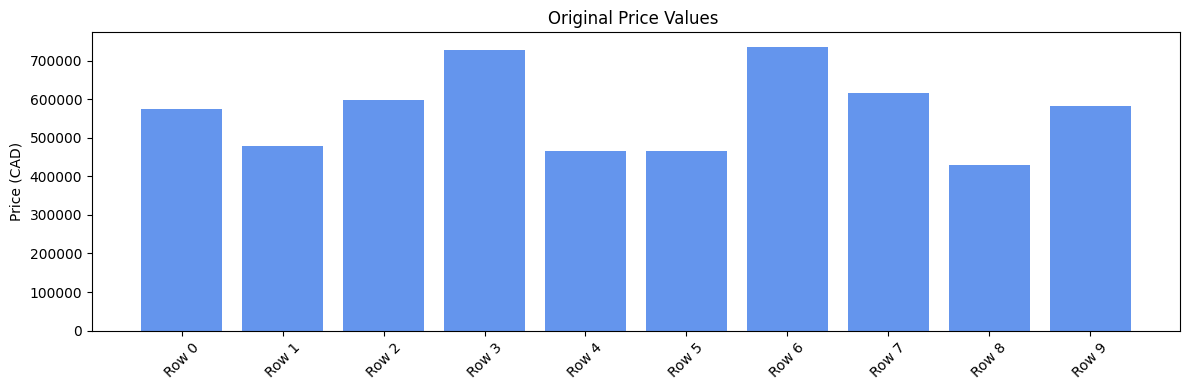

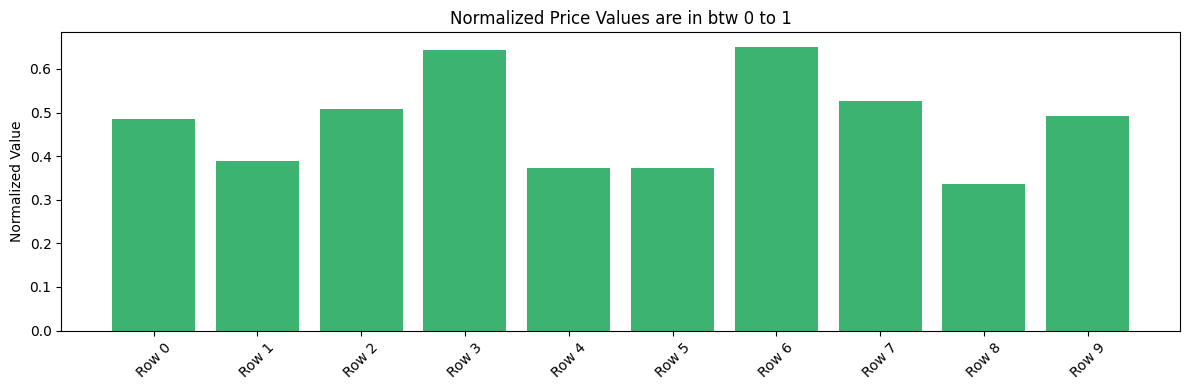

In [8]:
# Create two separate bar charts:
# One showing actual Price values, the other showing normalized Price values (0 to 1 scale)

# Sample the first 10 rows
sample_data = house_data.iloc[:10]
x_labels = [f'Row {i}' for i in sample_data.index]

# Plot original Price values
plt.figure(figsize=(12, 4))
plt.bar(x_labels, sample_data['Price'], color='cornflowerblue')
plt.title('Original Price Values ')
plt.ylabel('Price (CAD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot normalized Price values
plt.figure(figsize=(12, 4))
plt.bar(x_labels, sample_data['Price_norm'], color='mediumseagreen')
plt.title('Normalized Price Values are in btw 0 to 1')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


These two bar charts help us clearly understand the effect of Min-Max normalization.

- The first chart shows the actual Price values for the first 10 houses.  
  The prices vary widely, from low to high.

- The second chart shows the same prices after applying Min-Max scaling.  
  Now, all values are between 0 and 1.

Even though the height of the bars is different, the overall pattern stays the same.  
This shows that Min-Max scaling keeps the order and spacing between values,  
but changes the range to make all values fit between 0 and 1.

This helps models compare features more fairly, especially when units are different.


##  Conclusion

In this notebook, we applied **manual Min-Max normalization** to important numeric features in our housing dataset.

### Why We Did This:
- Features like Price, Area, and Lot Size have large value ranges.
- Other features like Number of Bedrooms are on a much smaller scale.
- This mismatch in scale can **confuse machine learning models** like KNN, linear regression, and neural networks.
- Normalization puts all features on a common scale (0 to 1), which helps models **treat them fairly**.

### What We Achieved:
- We checked data quality (missing values, outliers) before scaling.
- We normalized Price, Area_sqft, and Lot_Size using the **Min-Max method**.
- We kept original values intact and stored min/max values for reproducibility.
- We visualized and interpreted the effect of scaling using charts and examples.

### How This Helps Going Forward:
- The normalized dataset is now **ready for training machine learning models**.
- Models will perform better because no feature dominates due to its large scale.
- This also improves **convergence speed, accuracy, and interpretability** during training.

In the next steps, we can confidently use this scaled data for:
- K-Nearest Neighbors
- Linear or logistic regression
- Neural networks and more

Normalization ensures our features are balanced — which is a critical step in building good models.


### 🔎 Talking Point 1 — [Insert your review comment here]

- Code Quality Improvements: 
  - The normalized values are not explicitly rounded. To round off to 4 digits for more clarity. 
  - The code normalizes all numeric columns, which may include ID, Year, or other irrelevant fields.

Reviwed by: Team 8  
- Name: Mandeep Singh Brar
- Name: Babandeep
- Name: Hasyashri Bhatt